In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import gzip
from sklearn.inspection import permutation_importance

In [2]:
# Function to load a gzipped model
def load_model(gzip_path):
    with gzip.GzipFile(gzip_path, "rb") as f:
            model = pickle.load(f)
    
    # with gzip.open(filename, 'rb') as f:
    #     model = joblib.load(f)
    return model

# Function to plot feature importances
def plot_feature_importances(importances, classifier_name, feature_names, top_n=20):
    indices = np.argsort(importances)[::-1]
    top_indices = indices[:top_n]
    sorted_feature_names = [feature_names[i] for i in top_indices]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(top_n), importances[top_indices], align='center')
    plt.xticks(range(top_n), sorted_feature_names, rotation=90)
    plt.title(f'Top {top_n} Feature Importances - {classifier_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

In [3]:
classifiers = {
            "Logistic_Regression": 'Logistic_Regression_BE.sav.gz',
            "Gaussian_NB":'Gaussian_NB_BE.sav.gz',
            "Bernoulli_NB":'Bernoulli_NB_BE.sav.gz',
            "Decision_Tree":'Decision_Tree_BE.sav.gz',
            "Random_Forest":'Random_Forest_BE.sav.gz',
            "Extra_Trees_Classifier":'Extra_Trees_Classifier_BE.sav.gz',
            "Ada_Boost":'Ada_Boost_BE.sav.gz',
            "Gradient_Boosting":'Gradient_Boosting_BE.sav.gz',
            "LightGBM":'LightGBM_BE.sav.gz',
            "Hist_GB":'Hist_GB_BE.sav.gz',
            "XGBoost":'XGBoost_BE.sav.gz',
}

In [8]:
response_data = pd.read_parquet('../data/processed/chrome/08_12_2022/test_set_featurized_response_BE.parquet.gzip', engine='pyarrow', dtype_backend='pyarrow')

In [9]:
response_data

,comb_col_non_tracker,comb_col_tracker,amp-access-control-allow-source-origin_binary,x-hubspot-correlation-id_binary,x-tt-trace-tag_binary,cdn-pullzone_binary,x-akamai-request-id_binary,requestid_binary,x-vcl-time-ms_binary,cross-origin-opener-policy_binary,...,cdn-uid_binary,x-served-by_binary,x-accel-expires_binary,request-context_binary,x-powered-by_binary,date_binary,content-security-policy_binary,x-request-id_binary,httpMessageId,tracker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,22,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,235,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,146,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,246,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,103,1
171740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,197,0
171741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,229,0
171742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,55,0


In [10]:
X = response_data.iloc[:, 2:-2]  # All columns except the last
y = response_data.iloc[:, -1]   # The last column
feature_names = X.columns.tolist()

/Users/wolfrieder/Documents/github_repos/thesis_project_v2/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


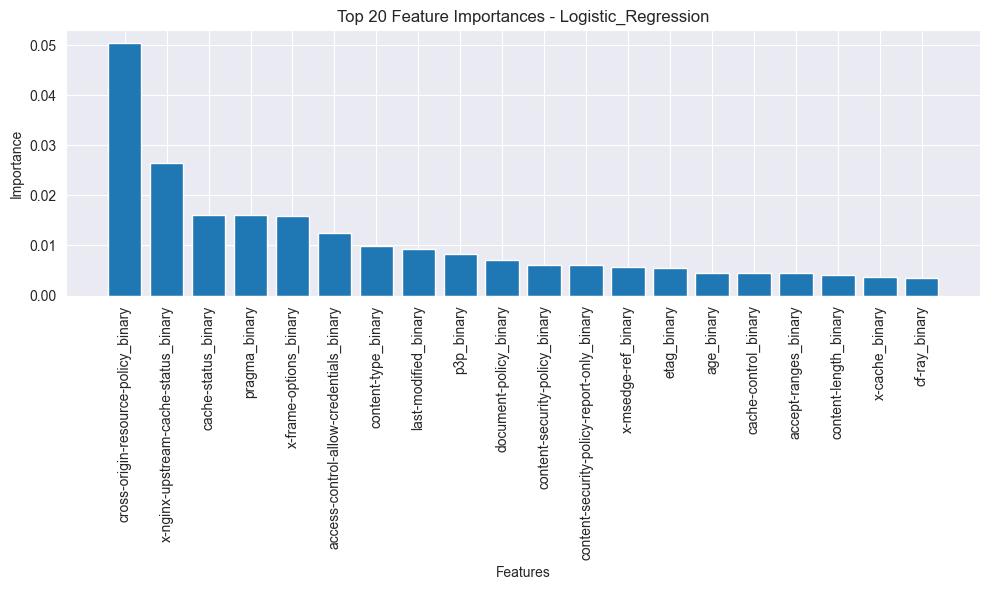

/Users/wolfrieder/Documents/github_repos/thesis_project_v2/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


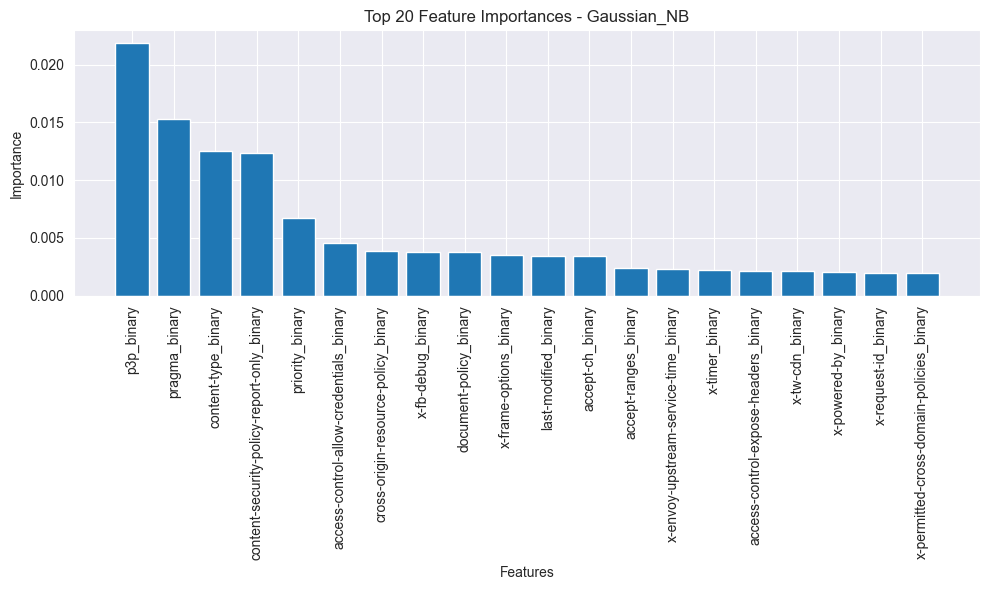

/Users/wolfrieder/Documents/github_repos/thesis_project_v2/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


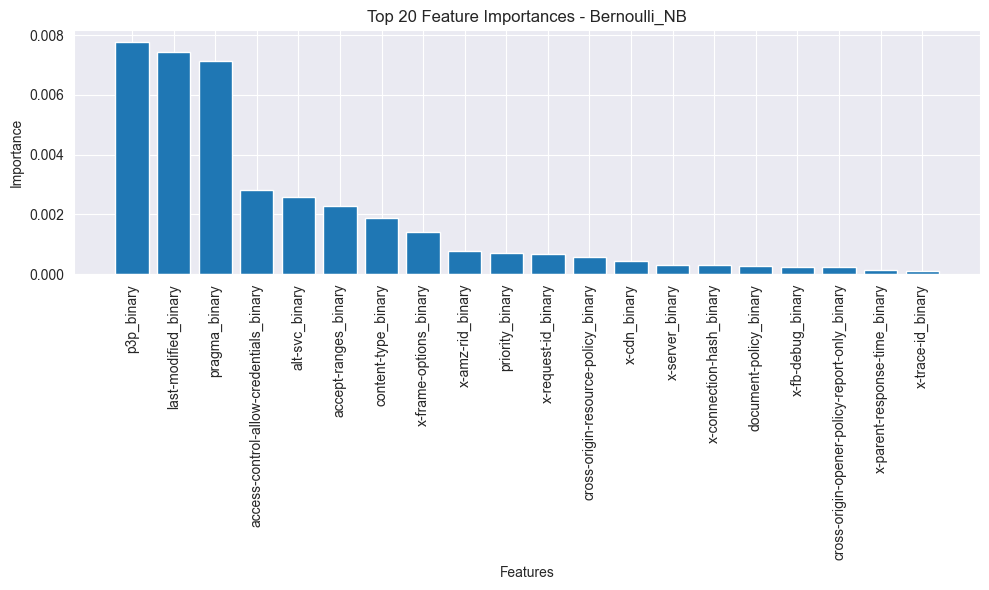

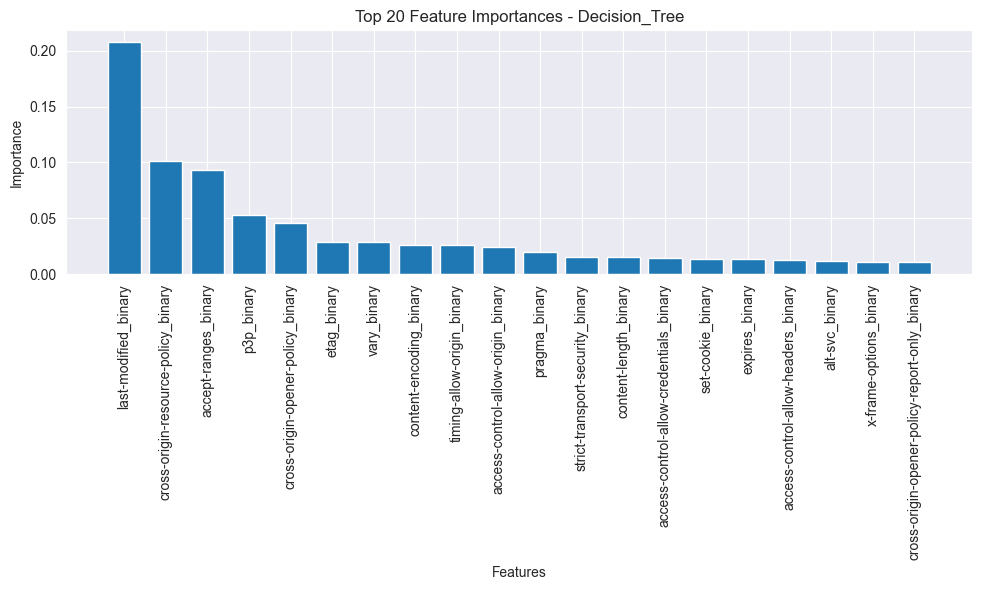

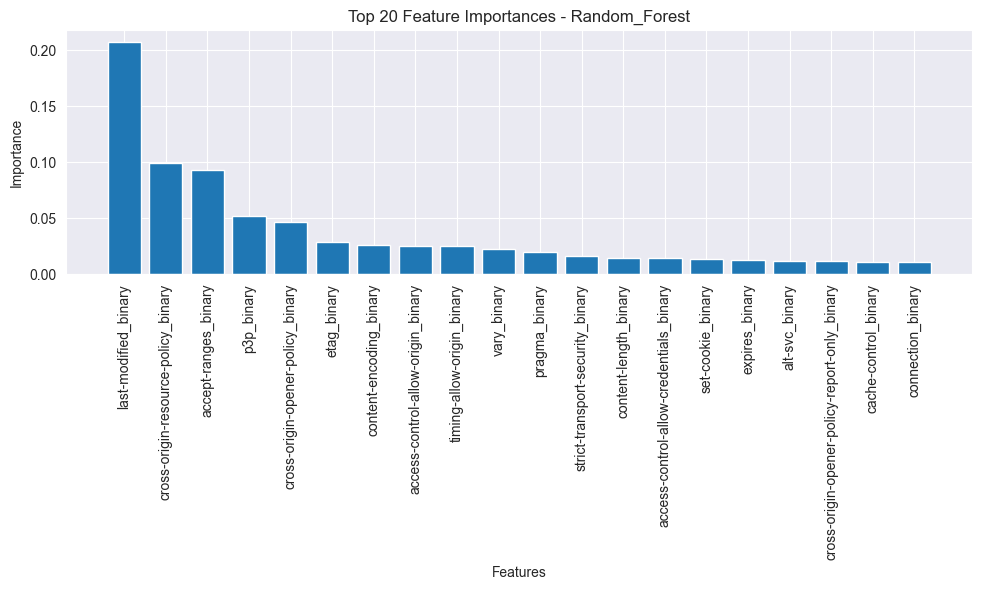

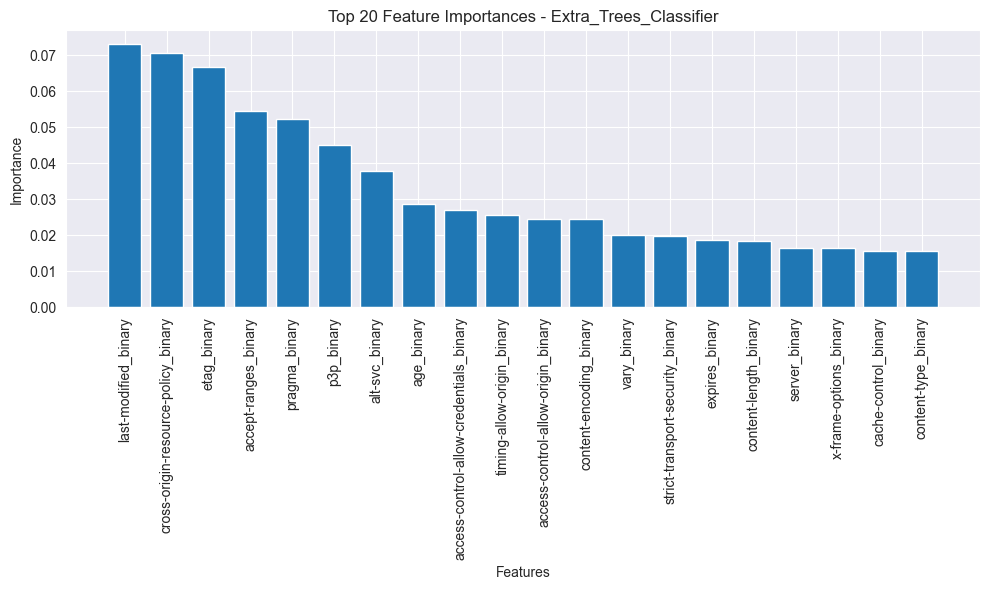

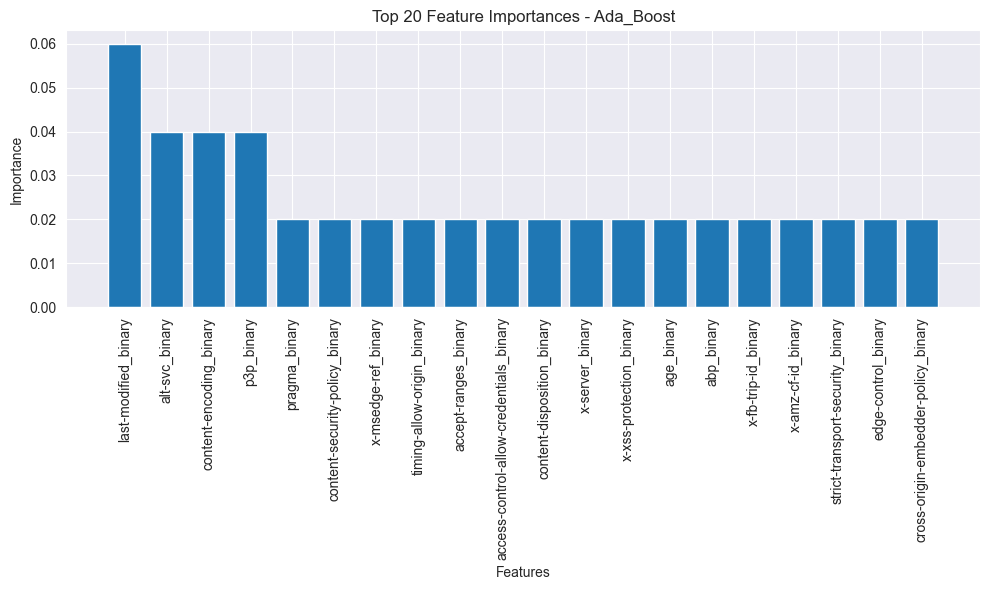

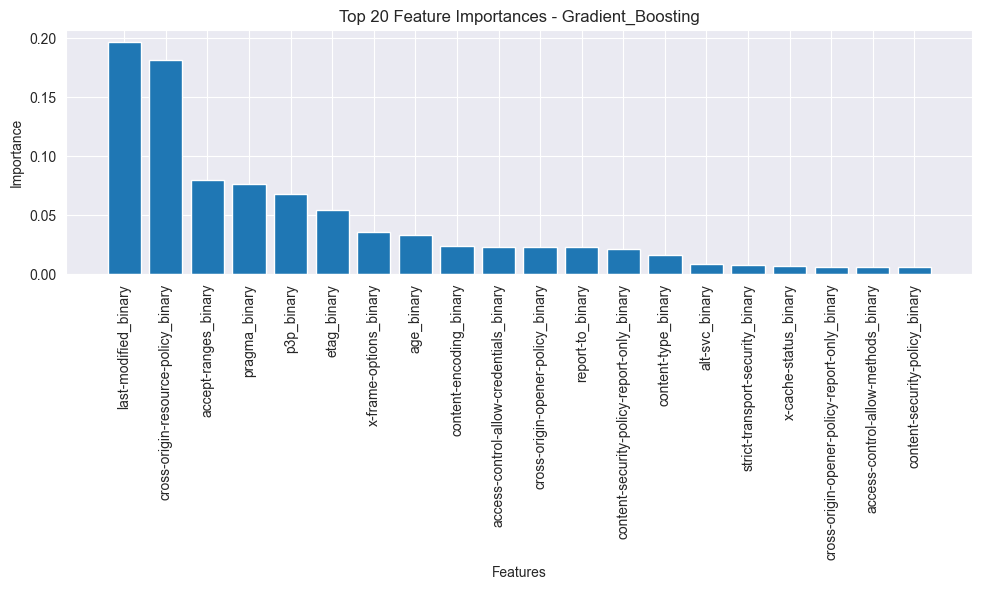

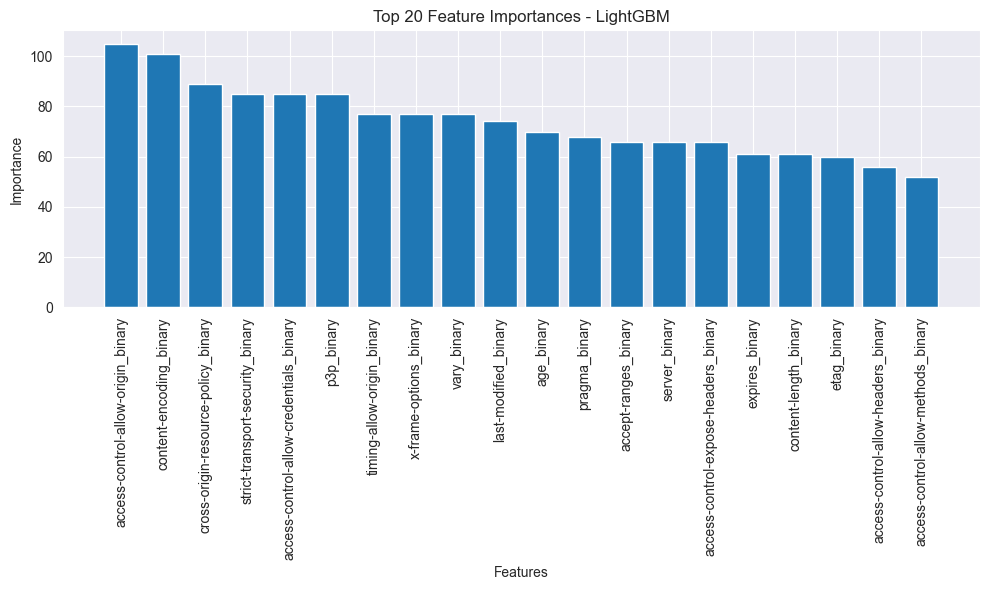

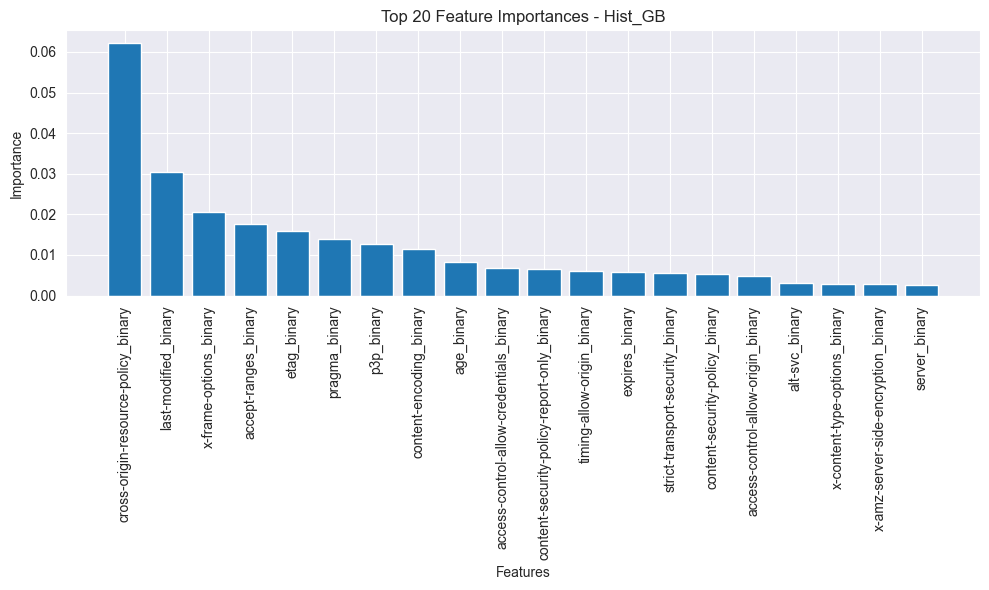

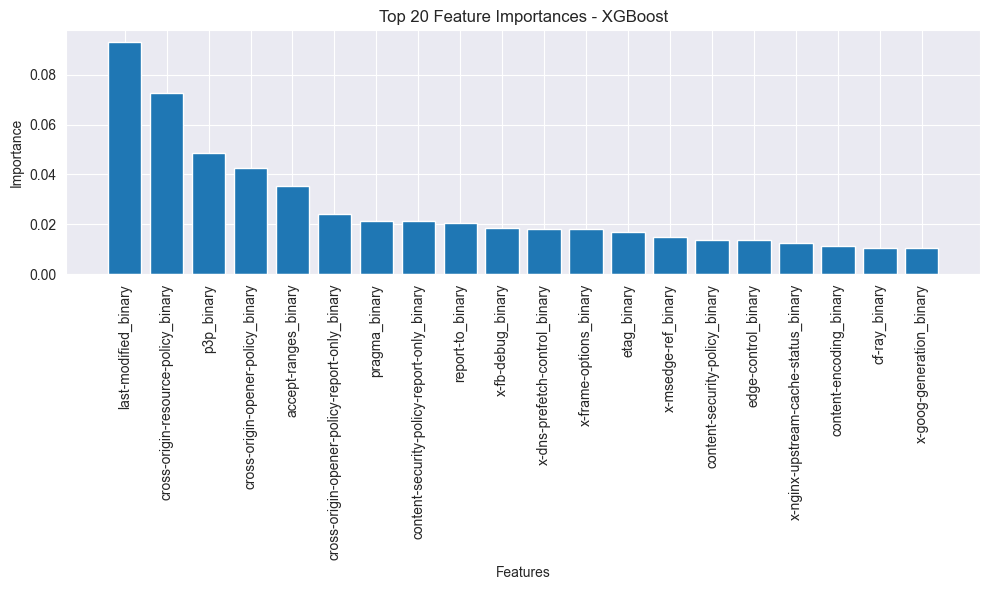

In [13]:
# Load the models and plot feature importances
for name, file in classifiers.items():
    gzip_path = f"../models/chrome/08_12_2022/response/{file}"
    clf = load_model(gzip_path)
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        plot_feature_importances(importances, name, feature_names)
    else:
        # Calculate permutation importance
        result = permutation_importance(clf, X, y, n_repeats=10, random_state=10, n_jobs=-1)
        importances = result.importances_mean
        plot_feature_importances(importances, name, feature_names)

In [30]:
response_data_train = pd.read_parquet('../data/processed/chrome/08_12_2022/train_set_processed_response.parquet.gzip', engine='pyarrow', dtype_backend='pyarrow')

In [31]:
response_data_train

,amp-access-control-allow-source-origin,x-hubspot-correlation-id,x-tt-trace-tag,cdn-pullzone,x-akamai-request-id,requestid,x-vcl-time-ms,cross-origin-opener-policy,api-version,x-dns-prefetch-control,...,x-accel-expires,request-context,x-powered-by,date,content-security-policy,x-request-id,httpMessageId,tracker,comb_col_non_tracker,comb_col_tracker
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,"fri, 12 aug 2022 16:29:45 gmt",<NA>,<NA>,576005,1,0,0
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,@1688199356,<NA>,<NA>,"fri, 12 aug 2022 14:57:10 gmt",<NA>,<NA>,459458,0,6,0
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,"fri, 12 aug 2022 16:22:50 gmt",<NA>,<NA>,567262,0,2,0
3,<NA>,<NA>,id=5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,"fri, 12 aug 2022 19:19:43 gmt",<NA>,<NA>,796197,0,4,0
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,"fri, 12 aug 2022 18:12:14 gmt",<NA>,<NA>,704416,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618271,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,"fri, 12 aug 2022 14:03:47 gmt",<NA>,<NA>,388320,1,0,0
618272,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"same-origin; report-to=""botguard-scs""",<NA>,<NA>,...,<NA>,<NA>,<NA>,"fri, 12 aug 2022 10:12:44 gmt",<NA>,<NA>,323057,1,0,0
618273,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,864723,1,0,0
618274,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,"fri, 12 aug 2022 17:27:34 gmt",<NA>,<NA>,643714,0,5,0


In [34]:
response_data.iloc[:, 2:]

,accept-language_binary,tracestate_binary,accept-encoding_binary,authorization_binary,content-type_binary,x-youtube-client-version_binary,x-goog-visitor-id_binary,access-control-request-headers_binary,newrelic_binary,viewport-width_binary,...,sec-ch-ua-model_binary,x-youtube-client-name_binary,traceparent_binary,dpr_binary,sec-fetch-dest_binary,x-client-data_binary,accept_binary,sec-fetch-mode_binary,httpMessageId,tracker
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,234,0
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,18,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,43,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,151,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618274,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,158,1
618275,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,197,1
618276,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,160,1
618277,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,162,0
